In [14]:
from omega.dataBase import EOD
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [2]:
rb888 = EOD("rb888", "15min")

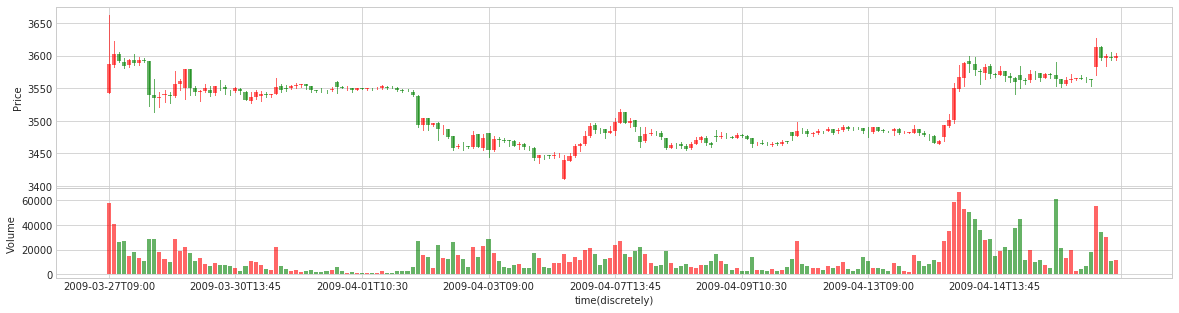

(<matplotlib.axes._subplots.AxesSubplot at 0x7f82529e8160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f824b8f2128>)

In [3]:
rb888[:200, :].plot()

In [4]:
rb888.open.shape

(40534,)

In [5]:
def dist_ed(x1, y1, x3, y3, x2, y2):
    return np.sqrt(np.power(x2-x1, 2)+np.power(y2-y1, 2)) + np.sqrt(np.power(x3-x2, 2)+np.power(y3-y2, 2))
def dist_pd(x1, y1, x3, y3, x2, y2):
    "x3 should never be the same as x1"
    s = (y3-y1) / (x3-x1)
    xc = (x2 + s*y2 + s**2*x3-s*y3) / (1+s**2)
    yc = s*xc - s*x3+y3
    return np.sqrt(np.power(xc-x2, 2)+np.power(yc-y2, 2))
def dist_vd(x1, y1, x3, y3, x2, y2):
    "x3 should never be the same as x1"
    s = (y3-y1) / (x3-x1)
    return np.abs(y1+(x2-x1)*s-y2)

def filter_pip(xarr, yarr, k=3):
    if xarr.shape != yarr.shape or xarr.shape[0] <= k:
        raise ValueError("xarr should have the same length as yarr")
        
    num = xarr.shape[0]
    out = [0, num-1]
    
    while len(out) < k:
        wgts = np.zeros(num)
        for sidx, eidx in zip(out[:-1], out[1:]):
            if sidx+1 == eidx:
                continue
            ed = dist_ed(xarr[sidx], yarr[sidx], xarr[eidx], yarr[eidx], xarr[sidx+1:eidx], yarr[sidx+1:eidx])
            pd = dist_pd(xarr[sidx], yarr[sidx], xarr[eidx], yarr[eidx], xarr[sidx+1:eidx], yarr[sidx+1:eidx])
            vd = dist_vd(xarr[sidx], yarr[sidx], xarr[eidx], yarr[eidx], xarr[sidx+1:eidx], yarr[sidx+1:eidx])
            wgts[sidx+1:eidx] = np.max([ed, pd, vd], axis=0)
            
        next_id = np.argmax(wgts)
        
        if next_id in out:
            print("Should not happen in common data")
            next_id = 0
            while next_id in out:
                next_id = np.random.randint(0, num)

        out.append(next_id)
        out.sort()
    
    return np.array(out)

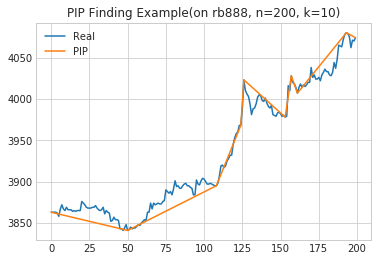

In [7]:
num = 1000
xarr = np.arange(200)
yarr = rb888.open[num:num+200]

out = filter_pip(xarr, yarr, 10)

plt.plot(xarr, yarr, label="Real")
plt.plot(xarr[out], yarr[out], label="PIP")
plt.title("PIP Finding Example(on rb888, n=200, k=10)")
plt.legend()
# plt.savefig("pip examples.jpg")

In [26]:
def data_iter(data, sig, train_window = 500, predict_window = 500):
    
    num = data.info.maxlen
    indices = list(range(train_window, num-predict_window))
    random.shuffle(indices)
    
    for i in indices:
        train = data[i-train_window:i]
        predict = data[i-train_window:i+predict_window]
        
        yield train, predict
        
for t, p in data_iter(rb888):
    print(t.info.start, p.shape)
    break


2015-10-29T09:15 (1000, 6, 1)


## DTW/PLA Method

## OLS Method